<a href="https://colab.research.google.com/github/savagenashe/gdsc/blob/main/labAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 40.8 MB/s 
     |████████████████████████████████| 189 kB 47.4 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 51 kB 295 kB/s 
Mounted at /content/gdrive


In [5]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


**Downloading the dataset**



In [6]:
path = untar_data(URLs.MNIST)

In [7]:
#hide
Path.BASE_PATH = path

**Listing all the files in the dataset**

In [8]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [9]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/8'),Path('training/4'),Path('training/2'),Path('training/1'),Path('training/0'),Path('training/7'),Path('training/3'),Path('training/9'),Path('training/6')]

Taking a look at the 3,1,8 and 7s only

In [11]:
threes = (path/'training/3').ls().sorted()
eights = (path/'training/8').ls().sorted()
ones = (path/'training/1').ls().sorted()
sevens = (path/'training/7').ls().sorted()
threes

(#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/3/10011.png'),Path('training/3/10031.png'),Path('training/3/10034.png'),Path('training/3/10042.png'),Path('training/3/10052.png'),Path('training/3/1007.png'),Path('training/3/10074.png'),Path('training/3/10091.png')...]

Taking a look at one image

In [12]:
im8_path = eights[1]
im8 = Image.open(im8_path)
im8

displaying the numpy array of the above image

In [13]:
array(im8)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,  58, 125, 245, 187, 254],
       [  0, 118, 253, 253, 253, 253],
       [  0, 242, 253, 253, 253, 253],
       [  0, 194, 253, 253, 253, 253],
       [  0,  73, 198, 253, 253, 253]], dtype=uint8)

In [14]:
tensor(im8)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,  58, 125, 245, 187, 254],
        [  0, 118, 253, 253, 253, 253],
        [  0, 242, 253, 253, 253, 253],
        [  0, 194, 253, 253, 253, 253],
        [  0,  73, 198, 253, 253, 253]], dtype=torch.uint8)

showing the pixel values of the image using Pandas DataFrame

In [15]:
im8_t = tensor(im8)
df = pd.DataFrame(im8_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,58,125,245,187,254,255,214,125,225,157,35,0,0,0,0,0,0
2,0,118,253,253,253,253,253,253,253,253,253,249,136,0,0,0,0,0
3,0,242,253,253,253,253,253,253,253,253,253,253,251,137,0,0,0,0
4,0,194,253,253,253,253,108,19,56,48,140,253,253,250,235,235,225,46
5,0,73,198,253,253,253,245,188,71,76,201,253,253,253,253,253,195,68
6,0,0,14,152,197,253,253,253,244,246,253,253,253,239,162,82,13,0
7,0,0,0,0,15,152,240,253,253,253,253,253,253,170,0,0,0,0
8,0,0,0,0,0,0,215,253,253,253,253,253,253,191,0,0,0,0
9,0,0,0,0,0,26,226,253,233,81,148,233,253,245,185,28,0,0


Creating a tensor of stacked numbers 

In [16]:
eight_tensors = [tensor(Image.open(o)) for o in eights]
three_tensors = [tensor(Image.open(o)) for o in threes]
one_tensors = [tensor(Image.open(o)) for o in ones]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(one_tensors),len(eight_tensors),len(seven_tensors)

(6131, 6742, 5851, 6265)

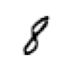

In [17]:
show_image(eight_tensors[6])

Stacking the images and displaying the shape

In [18]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_eights.shape

torch.Size([5851, 28, 28])

In [19]:
len(stacked_eights.shape)

3

In [20]:
stacked_threes.ndim

3

Calculating the mean of all images and displaying what an ideal 8 looks like

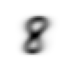

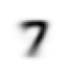

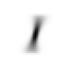

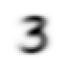

In [25]:
mean8 = stacked_eights.mean(0)
show_image(mean8);

mean7 = stacked_sevens.mean(0)
show_image(mean7);

mean1 = stacked_ones.mean(0)
show_image(mean1);

mean3 = stacked_threes.mean(0)
show_image(mean3);

Measuring distance of ideal digits


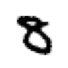

In [23]:
a_8 = stacked_eights[1]
show_image(a_8);

using L1 norm and L2 norm

In [29]:
dist_8_abs = (a_8 - mean8).abs().mean()
dist_8_sqr = ((a_8 - mean8)**2).mean().sqrt()
dist_8_abs,dist_8_sqr


(tensor(0.1959), tensor(0.3387))

In [28]:
dist_7_abs = (a_8 - mean7).abs().mean()
dist_7_sqr = ((a_8 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1984), tensor(0.3574))

the Loss function

In [30]:
F.l1_loss(a_8.float(),mean7), F.mse_loss(a_8,mean7).sqrt()

(tensor(0.1984), tensor(0.3574))

Separating the validation set

In [32]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid/3').ls()])
valid_3_tens = valid_3_tens.float()/255

FileNotFoundError: ignored